<a href="https://colab.research.google.com/github/Yanboding/MIE8888Project-mistriageMortalityRationship/blob/main/MIE8888.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!apt install imagemagick

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  fonts-droid-fallback fonts-noto-mono ghostscript gsfonts
  imagemagick-6-common imagemagick-6.q16 libcupsfilters1 libcupsimage2
  libdjvulibre-text libdjvulibre21 libgs9 libgs9-common libijs-0.35
  libjbig2dec0 liblqr-1-0 libmagickcore-6.q16-3 libmagickcore-6.q16-3-extra
  libmagickwand-6.q16-3 libnetpbm10 libwmf0.2-7 netpbm poppler-data
Suggested packages:
  fonts-noto ghostscript-x imagemagick-doc autotrace cups-bsd | lpr | lprng
  enscript gimp gnuplot grads hp2xx html2ps libwmf-bin mplayer povray radiance
  sane-utils texlive-base-bin transfig ufraw-batch inkscape libjxr-tools
  libwmf0.2-7-gtk poppler-utils fonts-japanese-mincho | fonts-ipafont-mincho
  fonts-japanese-gothic | fonts-ipafont-gothic fonts-arphic-ukai
  fonts-arphic-uming fonts-nanum
The following NEW packages will be installed:
  fonts-droid-fallback fonts-noto-mono g

In [1]:
import SimFunctions
import SimRNG 
import SimClasses
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.integrate import odeint, quad
from scipy.special import gamma
import scipy.stats
from pprint import pprint
import matplotlib 
from matplotlib import animation
import copy
print(matplotlib. __version__) 

3.2.2


# OED solver for Virtual Waiting Time and Mortality

Defining $\rho_k(t)=\frac{\lambda_k(t)}{\mu_k(t)}$ to be the offered load of the $k$th job class at the time $t$ for $k= 1...K$.  
Assumption (A1). For each job class $k \in \{1,...,K\}$, the deadline distribution $F_k$ is continuous. Furthermore, $F_k(t) = 0 \, \forall t \leq 0$ and $\lim_{t\to\infty} F(t)=1$.  
Consider the unbounded virtual waiting time, $\tilde{W}: \mathbb R^+ \rightarrow \mathbb R$, that can have value less than zero. We may now state the main method to calculate the virtual waiting time, $W(t)$.  
Theorem 1: Under Assumption(A1), if $W(s)$ is the virtual waiting time at the time $s$, and $\tilde{W}(t)$ is monotomic in the interval $[s,u]$, then $\tilde{W}(t)$ is the unique solution of 
$$
\begin{cases}
\tilde{W}'(t)=-1+\sum_{k}\rho_k(t)G_k(\tilde{W}(t)) \\
\tilde{W}(0) = W(s)
\end{cases}
$$
Also, the virtual waiting time in the intervial $[s,u]$ is
$$W(t) = max(0, \tilde{W}(t))$$

# Arrival Rate Plot

In [2]:
def arrivalRatePlot(x_range, y_range, arrivalRate, cumArrivalRate, arrivalRateInverse):
    t = np.linspace(0,x_range,x_range+1)
    arrivalRate = np.vectorize(arrivalRate)
    cumArrivalRate = np.vectorize(cumArrivalRate)
    arrivalRateInverse = np.vectorize(arrivalRateInverse)
    fig, axs = plt.subplots(1,2, figsize=(20, 10))
    axs[0].plot(t, arrivalRate(t), '-', label='lambda(t)')
    axs[1].plot(t, cumArrivalRate(t), '-', label='Lambda(t)')
    t = np.linspace(0,y_range, y_range+1)
    axs[1].plot(t, arrivalRateInverse(t), '-', label='Lambda^-1(t)')

    plt.legend()
    plt.show()

$\lambda(t)=
\begin{cases}
\frac{1}{50}t & \text{if } 0 \leq t < 100 \\
-\frac{1}{50}(t-200) & \text{if } 100\leq t < 200 \\
\frac{1}{50}(t-300) & \text{if } 300 \leq t < 400 \\
-\frac{1}{50}(t-500) & \text{if } 400\leq t < 500 \\
0 & \text{otherwise}
\end{cases}$  
Because $\Lambda(t)=\int_{0}^{t}\lambda(t)$,  
$\Lambda(t)=
\begin{cases}
\frac{1}{100}t^2 & \text{if } 0 \leq t < 100 \\
-\frac{1}{100}(t-200)^2+200 & \text{if } 100\leq t < 200 \\
200 & \text{if } 200 \leq t < 300 \\
\frac{1}{100}(t-300)^2 + 200 & \text{if } 300 \leq t < 400 \\
-\frac{1}{100}(t-500)^2 + 400 & \text{if } 400\leq t < 500 \\
400 & \text{if } t \geq 500
\end{cases}$  
Let $\Lambda^{-1}(t)$ be the inverse of $\Lambda(t)$  
$\Lambda^{-1}(t)=
\begin{cases}
10\sqrt{t} & \text{if } 0 \leq t < 100 \\
-10\sqrt{-t+200}+200 & \text{if } 100\leq t < 200 \\
10\sqrt{t-200}+300 & \text{if } 200 < t < 300 \\
-10\sqrt{-t+400}+500 & \text{if } 300 \leq t < 400 
\end{cases}$

# Carmel Arrival Rate

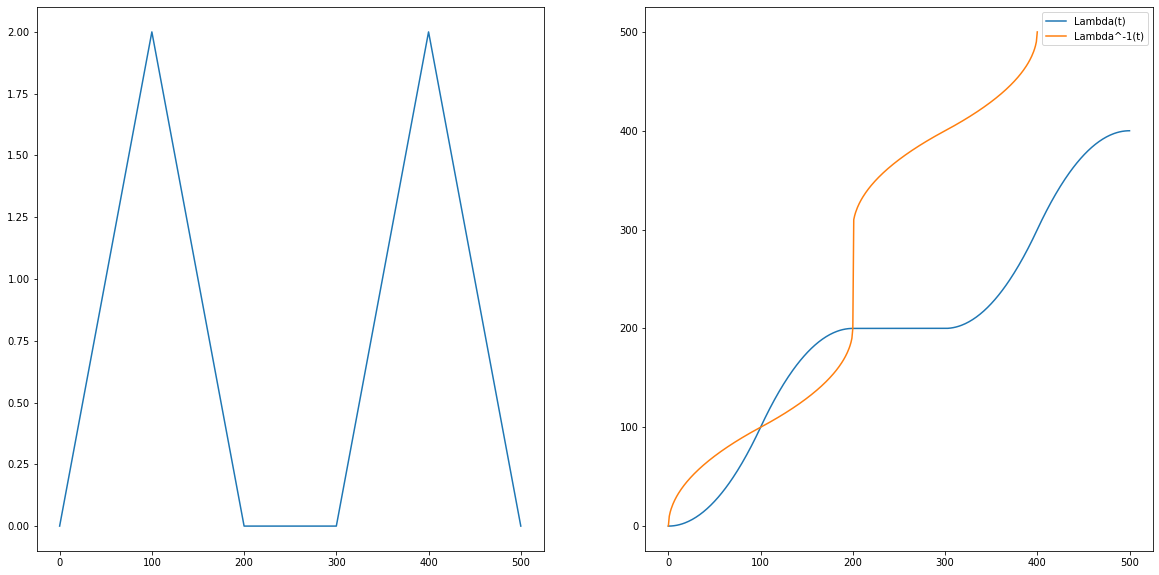

In [3]:
def carmelArrivalRate(t):
    if t<100:
        return 1/50 * t
    elif 100<=t <= 200:
        return -1/50 *(t - 200)
    elif 300<t<400:
        return 1/50 * (t-300)
    elif 400<=t<500:
        return -1/50 *(t- 500)
    else:
        return 0

def carmelCumArrivalRate(t):
    if t < 100:
        return 1/100*t**2
    elif 100<=t<200:
        return -1/100 *(t-200)**2 + 200
    elif 200<=t<300:
        return 200
    elif 300<=t<400:
        return 1/100*(t-300)**2 + 200
    elif 400<=t<500:
        return -1/100 *(t-500)**2 + 400
    else:
       return 400

def carmelArrivalRateInverse(t):
    if t<100:
        return 10*np.sqrt(t)
        #y=1/100t^2
        #100t
    elif 100<=t<=200:
        return -10*np.sqrt(-t+200)+200
        #-1/100*t**2+4*t-200
    elif 200<t<300:
        return 10*np.sqrt(t-200)+300
        #y=1/100(t-300)^2 + 200
    elif 300<=t<=400:
        return -10*np.sqrt(-t+400)+500
arrivalRatePlot(500, 400, carmelArrivalRate, carmelCumArrivalRate, carmelArrivalRateInverse)

In [4]:
def constantArrivalRate(t):
    return 2

In [5]:
def linearArrivalRate(t):
    return 2*t/700

In [6]:
def parabolaArrivalRate(t):
    return -2/(250**2)*t**2+4/250*t

In [7]:
def sin(t):
    return np.sin(t)+1

In [ ]:
from scipy.stats import lognorm
rv = lognorm(s=1, scale=np.exp(80))
rv.cdf(8000)

0.0

In [ ]:
def UniformCDF(t, a, b):
    return np.clip((t - a)/(b-a), 0, 1)

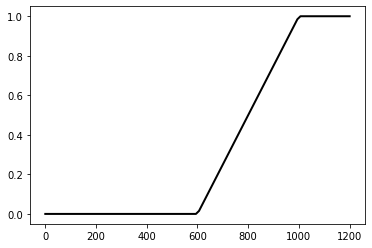

In [ ]:
fig, ax = plt.subplots(1, 1)
rv = scipy.stats.uniform(loc=600, scale=400)
x = np.linspace(0,1200, 100)
ax.plot(x, rv.cdf(x), 'k-', lw=2, label='frozen pdf')


In [8]:
def ExpoCDF(t, rate):
    if t<0:
      return 1
    return np.exp(-rate*t)

def UniformCDF(t, rate):
    mean = 1/rate
    a = mean - 200
    b = mean + 200
    p = 1 - np.clip((t-a)/400, 0, 1)
    return p
    
def thinningArrivalRate(prob, arrivalRate):
    def Lambda_k(t):
        Lambda = arrivalRate(t)
        return Lambda*prob
    return Lambda_k

def mortality_model(waits, t, G, gammas, arrivalRate, p_join):
    CDF = np.vectorize(G)
    Gs = np.array([CDF(waits, g) for g in gammas])
    Fs = 1 - Gs
    AR = np.vectorize(arrivalRate)
    Lambdas = AR(t).reshape(-1,1)*p_join
    return np.cumsum(np.sum(Fs*Lambdas.T, axis=0))

def VW_model(z, t, Lambda, Mu, Gamma, CDF):
    #print(prev_w, prev_t)
    w = z[0]
    Gs = np.array([CDF(w, g) for g in Gamma])
    Lambdas = Lambda(t)
    rhos = Lambdas/Mu(t)
    dwdt = -1 + np.sum(rhos*Gs)
    dwdt *= int(w>0 or (w<=0 and dwdt>0))
    return [dwdt]
    
def mortality_mistrage_relation(P, Q, arrivalRate, serviceRates, abandonMeans, X, stopTime):
    p_join = np.array(P)*np.array(Q)
    # lambda_k
    Lambda_k = thinningArrivalRate(p_join, arrivalRate)
    #gamma_k
    gammas = 1/np.array(abandonMeans)
    # linspace
    t = np.linspace(0,stopTime,stopTime+1)
    # initial condition
    z0 = [min(X)]
    sol = np.zeros((stopTime+1, 2))
    sol[0, 0] = z0[0]
    for i in range(1,stopTime+1):
        # span for next time step
        tspan = [t[i-1],t[i]]
        # solve for next step
        z = odeint(VW_model,z0,tspan,args=(Lambda_k, serviceRates, gammas, UniformCDF))
        z[1][0] = max(z[1][0], 0)
        # store solution for plotting
        # if the virtual waiting time is less than 0, set it to 0, and set the cumulative death to the previous solution
        sol[i, 0] =z[1][0]
        # next initial condition
        z0 = z[1]
    sol[:, 1] = mortality_model(sol[:, 0], t, ExpoCDF, gammas, arrivalRate, p_join)
    return sol

In [58]:
def constantRate(c):
    def f(t):
        return c
    return f

In [65]:
def thinningArrivalRate(prob, arrivalRate):
    ar = np.vectorize(arrivalRate)
    p_join = np.array(prob)
    def Lambda_k(t):
        return ar(t).reshape(-1, 1)*p_join
    return Lambda_k

def VW_model(z, t, Lambda, Mu, params, CDFs):
    #print(prev_w, prev_t)
    w = z[0]
    Gs = np.array([CDF(t=w, **g) for g, CDF in zip(params, CDFs)])
    rhos = Lambda(t).reshape(-1)/np.array([Mu_k(t) for Mu_k in Mu])
    dwdt = -1 + np.sum(rhos*Gs)
    dwdt *= int(w>0 or (w<=0 and dwdt>0))
    return [dwdt]

def mortality_model(waits, t, Lambda, params, CDFs):
    Gs = np.array([np.vectorize(CDF)(waits, **g) for g, CDF in zip(params, CDFs)])
    Fs = 1 - Gs
    Lambdas = Lambda(t)
    return np.cumsum(np.sum(Fs*Lambdas.T, axis=0)) 

def mortality_mistrage_relation(P, Q, arrivalRate, serviceRates, lifeDists, X, stopTime, lifeDistParams=[]):
    p_join = np.array(P)*np.array(Q)
    # lambda_k
    Lambda = thinningArrivalRate(p_join, arrivalRate)
    # linspace
    t = np.linspace(0,stopTime,stopTime+1)
    # initial condition
    z0 = [min(X)]
    sol = np.zeros((stopTime+1, 2))
    sol[0, 0] = z0[0]
    for i in range(1,stopTime+1):
        # span for next time step
        tspan = [t[i-1],t[i]]
        # solve for next step
        z = odeint(VW_model,z0,tspan,args=(Lambda, serviceRates, lifeDistParams, lifeDists))
        z[1][0] = max(z[1][0], 0)
        # store solution for plotting
        # if the virtual waiting time is less than 0, set it to 0, and set the cumulative death to the previous solution
        sol[i, 0] =z[1][0]
        # next initial condition
        z0 = z[1]
    sol[:, 1] = mortality_model(sol[:, 0], t, Lambda_k, lifeDistParams, lifeDists)
    return sol

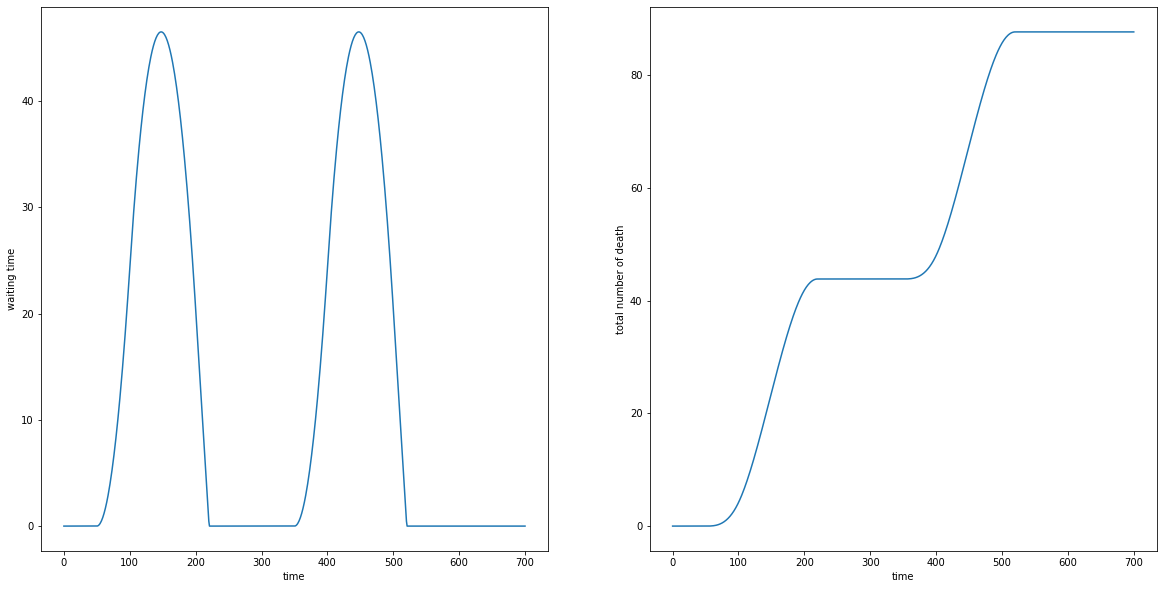

In [71]:
params = {"P": [0.4, 0.6],
          "Q": [1, 1],
          "arrivalRate": carmelArrivalRate,
          "serviceRates": [constantRate(1), constantRate(1)], 
          "lifeDists":[ExpoCDF, ExpoCDF],
          "lifeDistParams":[{'rate': 1/800}, {'rate':1/1200}],
          "X":[0],
          "stopTime":700}
fig, ax = plt.subplots(1,2, figsize=(20, 10))
t = np.linspace(0, params['stopTime'], params['stopTime']+1)
ax[0].set_xlabel('time')
ax[0].set_ylabel('waiting time')
ax[1].set_xlabel('time')
ax[1].set_ylabel('total number of death')
sol = mortality_mistrage_relation(**params)
ax[0].plot(t, sol[:, 0])
ax[1].plot(t, sol[:, 1])
plt.show()

$$\lambda(t)=
\begin{cases}
2 & \text{if } 100 < t \leq 200\\
0.2 & \text{otherwise}\\
\end{cases}$$
Suppose the arrival rate $\lambda(t)$ is non-stationary, and 
let interarrival times $A_1, A_2,...$ be i.i.d samples from a distribution $G$ with bounded rate $\lambda(t)$, i.e. we can express G given $\lambda(t)$.  
Let $G_{\tilde{\lambda}}$ be the base distribution, which is the distribution $G$ with rate $\tilde{\lambda}=max_t \lambda(t)$. If the arrival time of $n-1$ instance, $S_{n-1}$, is given, to generate interarrival time of $n$th instance using thinning method is as follows:  
1. Let $t = S_{n-1}$ keep tracking of the current time
2. Loop    
(a) Generate a potential interarrival time $\tilde{A}$ ~ $G_{\tilde{\lambda}}$ (e.g. using inverse method)  
(b) Update $t = t + \tilde{A}$  
(c) Generate $U$ ~ $U(0,1)$  
until $U \leq \lambda(t)/\tilde{\lambda}$
3. The interarrival time of $n$th instance is $t - S_{n-1}$

# Simulation

In [10]:
class Exponential:
    
    def __init__(self, rate, Stream):
        self.rate = rate
        self.Stream = Stream
    
    def sample(self):
        return SimRNG.Expon(1/self.rate, self.Stream)

In [11]:
def createConstantGenerator(constant, Stream):
    '''
    Create a constant generator, return the given constant and next stream to use
    '''
    def Generator(obj=None):
        return constant
    return Generator, Stream

def createMultiConstantGenerator(constants, Stream):
    def Generator(i):
        return constants[i-1]
    return Generator, Stream

def createExpoGenerator(Mean, Stream):
    '''
    Create a Exp Generator, return a genetrtor and next stream to use
    '''
    def Generator(obj=None):
        return SimRNG.Expon(Mean, Stream)
    return Generator, Stream + 1 

def createBaseExpoGenerator(Rate, Stream):
    return Exponential(Rate, Stream), Stream + 1

def createErlangGenerator(m, Mean, Stream):
    '''
    Create a normal distribution generator, return a genetrtor and next stream to use
    '''
    def Generator(obj=None):
        return SimRNG.Erlang(m, Mean, Stream)
    return Generator, Stream + 1

def createNormalGenerator(Mean, Variance, Stream):
    '''
    Create a normal distribution generator, return a genetrtor and next stream to use
    '''
    def Generator(obj=None):
        return SimRNG.Normal(Mean, Variance, Stream)
    return Generator, Stream + 1 

def createLognormal(MeanPrime, VariancePrime, Stream):
    '''
    Create a log-normal distribution generator, return a genetrtor and next stream to use
    '''
    def Generator(obj=None):
        return SimRNG.Lognormal(MeanPrime, VariancePrime, Stream)
    return Generator, Stream + 1

def createRandom_integerGenetrator(prob_distrib, Stream):
    '''
    Create a random integer generator, return a genetrtor and next stream to use
    '''
    def Generator(obj=None):
        return SimRNG.Random_integer(prob_distrib, Stream)
    return Generator, Stream + 1

def createHyoerExpGenerator(Stream):
    def hyperExp(p, lambda1, lambda2):
        U1 = SimRNG.Uniform(0,1, Stream)
        U2 = SimRNG.Uniform(0,1, Stream+1)
        if U1 <= p:
            return (-1/lambda1) * np.log(U2)
        return (-1/lambda2) * np.log(U2)
    return hyperExp, Stream + 2

In [ ]:
'''
def createNSAPInverseMethod(varA, base, arrivalRateInverse, Stream):
    first = True
    p = 0.5*(1+ np.sqrt((varA-1)/(varA+1)))
    lambda1 = 2*p
    lambda2 = 2*(1-p)
    S_tilde = 0
    S_prev = 0
    def NSAP(t):
        nonlocal S_tilde
        nonlocal S_prev
        nonlocal first
        if first:
            A_tilde = base(1/2, lambda1, lambda2)
            first = False
        else:
            A_tilde = base(p, lambda1, lambda2)
        S_tilde += A_tilde
        
        S = arrivalRateInverse(S_tilde)
        if S == None:
            return None
        A = S - S_prev
        S_prev = S
        return A
    return NSAP, Stream
'''

# Draw a sample path of virtual waiting time

In [12]:
import numpy as np
import pylab as pl
from matplotlib import collections  as mc
def drawVirtalWait(arrivalTime, virtualWaits, jumpTime, ax):
    lines = []
    dashlines = []
    prev = (arrivalTime[0], virtualWaits[0]+jumpTime[0])
    prevA = 0
    prevjump = jumpTime[0]
    for A, Y, X in zip(arrivalTime[1:], virtualWaits[1:], jumpTime[1:]):
        interA = A - prevA
        if interA > prevjump:
            lines.append([prev, (prevA+prevjump, 0)])
            prev = (prevA+prevjump, 0)
        lines.append([prev, (A, Y)])
        jump = Y+X
        prev = (A, jump)
        dashlines.append([(A, Y), (A, jump)])
        prevA = A
        prevjump = jump

    lc = mc.LineCollection(lines, linewidths=2)
    dash = mc.LineCollection(dashlines, colors='red',linestyles='--', linewidths=2)
    ax.add_collection(lc)
    ax.add_collection(dash)
    ax.margins(0.1)
    ax.set_title("Virtual Waiting Time")
    ax.set_xlabel("Time t")
    ax.set_ylabel("W(t)")

def drawCumDeath(arrivalTime, cumdead, ax):
    ax.plot(arrivalTime, cumdead)
    ax.set_title("Death over arrival time")
    ax.set_xlabel("Arrival Time t")
    ax.set_ylabel("Number of Death")
    

For G/G/1 + G,
let $\{A_n|n=1,2,...\}$ be a process of the interarrival times between customers (where A1 is the actual time of the first
arrival). Similarly, let $\{X_n|n=1,2,...\}$ be a process of service times of successive customers, and let $\{\tilde{X}_n| n=1,2,...\}$ be a process of the potential service time of successive customers. If the customer dies before the service, then the actual service time is 0. Also, let $\{D_n|n=1,2,...\}$ be a process of remaining life times of successive customers.Then if Y1,Y2, . . . are the successive virtual waiting times in queue (i.e., the time from customer arrival until service begins), a little thought reveals that
$$Y_n = max(Y_{n-1}+X_{n-1}-A_n, 0)$$
$$X_n = \mathbb 1(Y_n\le D_n) \tilde{X}_n$$
where we need to define $Y_0 = 0$ and $X_0 \geq 0$ to make the recursion work. $X_0$ is the initial occupation time of the server.

For G/G/s + G,
let $X_n = [X_{n,1}, X_{n,2},...,X_{n,s}]$ be an array that tracks of the remaining occupation time for each server at the time when the nth customer just enters the service. 
$$Y_n = max(Y_{n-1}+\min_{j=1,2,..s}(X_{n-1,j})-A_n, 0)$$
$$X_{n,j} = 
\begin{cases}
\mathbb 1(Y_n < D_n) \tilde{X}_n & \text{if } j=\underset{j=1,2,..s}{\operatorname{argmin}}(X_{n-1,j})\text{ break ties arbitrarily}\\
max(0, X_{n-1, j} - A_{n}) & \text{otherwise}\\
\end{cases}$$
where we need to define $Y_0 = 0, X_{0,j} \geq 0 \, \forall j=1,2,...s$ the recursion still works. $X_{0,j}$ is the initial occupation time of server $j$.


In [13]:
def LindleyWithAbandon(Y, X, A, D, tildeX):
    '''
    Calculate virtual waiting time, remaining occupation time and determine the abandonment

    Args:
        Y: the virtual waiting time of the previous patient
        X: the array of occupation times when the previous patient enters the service
        A: the interaveral time of the current patient
        D: the life remaining time of the current patient
        tildeX: the potential service time of the current patient
    
    Return:
    A tuple of (Y, X, abandon)
        Y: the virtual waiting time of the current patient
        X: the array of occupation times when the current patient enters the service
        abandon: a boolean that determains if the current patient abandons the queue
    '''
    j = np.argmin(X)
    Y = max(Y+X[j]-A, 0)
    abandon = False
    if D <= Y:
        tildeX = 0
        abandon = True
    X = np.maximum(X-A, 0)
    X[j] = tildeX
    return Y, X, abandon

In [14]:
def createNSAPthinningMethod(arrivalRate, base, Stream, fluidScale=1, T=float('inf')):
    def thinningMethod(t):
        S = t
        potentialArrival = base.sample()
        t += potentialArrival
        U = SimRNG.Uniform(0, 1, Stream)
        while t <= T and U > (arrivalRate(t)*fluidScale)/base.rate:
            potentialArrival = base.sample()
            U = SimRNG.Uniform(0, 1, Stream)
            t += potentialArrival
        if t > T:
            return None
        return t - S
    return thinningMethod, Stream+1

In [15]:
def createGenerators(P, Q, abandonMeans, serviceRates, stopTime, fluidScale=1, arrivalRateInverse=None, arrivalRate=None, maxRate=None,  method='thinning'):
    def patientFn(t):
        interArrivalTime = interArrivalTimeFn(t)
        if interArrivalTime == None:
            return None, None, None
        patientClass = classFn() 
        lifeRemaining = abandonFns[patientClass-1]()
        while triageFuns[patientClass-1]() != 1:
            A = interArrivalTimeFn(t+interArrivalTime)
            if A == None:
                return None, None, None
            interArrivalTime += A
            patientClass = classFn()
            lifeRemaining = abandonFns[patientClass-1]()
        return interArrivalTime, lifeRemaining, patientClass
    def serviceTimeFn(info):
        serviceTime = SimRNG.Expon(1/(serviceRates(0)[info-1]*fluidScale), Stream)
        return serviceTime
    Stream = 1
    classFn, Stream = createRandom_integerGenetrator(np.cumsum(P), Stream)
    triageFuns = []
    abandonFns = []
    for i in range(len(Q)):
        abandonMean, qk = abandonMeans[i], Q[i]
        abandonTimeFn, Stream = createExpoGenerator(abandonMean, Stream)
        TriageFn, Stream = createRandom_integerGenetrator([qk,1], Stream)
        triageFuns.append(TriageFn)
        abandonFns.append(abandonTimeFn)
    if method =='inverse':
        base, Stream = createHyoerExpGenerator(Stream)
        interArrivalTimeFn, Stream = createNSAPInverseMethod(1, base, arrivalRateInverse, Stream)
    elif method == 'thinning':
        base = Exponential(maxRate*fluidScale, Stream)
        interArrivalTimeFn, Stream = createNSAPthinningMethod(arrivalRate, base, Stream, fluidScale, stopTime)
    elif method == 'constant':
        interArrivalTimeFn, Stream = createConstantGenerator(arrivalRate, Stream)
        serviceTimeFn, Stream = createMultiConstantGenerator(serviceRates, Stream)
    return patientFn, serviceTimeFn

In [16]:
#G/G/s + G
def simulate(X, patientFn, serviceTimeFn, T):
    clock = 0
    Y = 0
    X = np.array(X)
    deadcount = 0
    arrivalTime = [0]
    virtualWaits = [0]
    jumpTime = [np.min(X)]
    cumdead = [0]
    old_clock = 0
    while clock < T:
        A, D, C = patientFn(clock)
        if A == None:
            break
        tildeX = serviceTimeFn(C)
        Y, X, abandon = LindleyWithAbandon(Y, X, A, D, tildeX)
        deadcount += abandon
        old_clock = clock
        clock += A
        arrivalTime.append(clock)
        virtualWaits.append(Y)
        cumdead.append(deadcount)
        jumpTime.append(np.min(X))
    return arrivalTime, virtualWaits, jumpTime, cumdead

In [17]:
#[0,1] 0.5 0, 1
def findClosestArrivalTime(t, arrivalTime):
    low = 0
    high = len(arrivalTime) - 1
    while low <= high:
        mid = (low + high)//2
        if arrivalTime[mid] < t:
            low = mid + 1
        elif arrivalTime[mid] > t:
            high = mid - 1
        else:
            return mid, True
    return high, False

In [18]:
def CreateVirtualWaitFn(arrivalTime, virtualWaits, jumpTime):
    def VirtualWaitFn(t):
        i, found = findClosestArrivalTime(t, arrivalTime)
        if found:
            return virtualWaits[i]
        else:
            return max(virtualWaits[i] + jumpTime[i] - t + arrivalTime[i], 0)
    VirtualWaitFn = np.vectorize(VirtualWaitFn, otypes=[float])
    return VirtualWaitFn

In [19]:
def CreateCumDeathFn(arrivalTime, cumdead):
    def CumDeathFn(t):
        i, found = findClosestArrivalTime(t, arrivalTime)
        return cumdead[i]
    CumDeathFn = np.vectorize(CumDeathFn, otypes=[float])
    return CumDeathFn
        

# Parameter Setting
In this section, we compare the performance of the limiting virtual waiting time $W(t)$ and the limiting protential total death $M(t)$. We obtain the sample virtual waiting process and sample protential total death discribed in section


# Effect of mistriage

## Generate overtriage data

## linear arrival rate

In [20]:
# overtriage = 1
# undertriage = 0
# Class1Prob = 0.4
# abandonMeans = [800, 1200]
# X = [0]
# T = 500
def mistriage_mortality(hparams):
    T = hparams['stopTime']
    t = np.linspace(0, T, T+1)
    ws = []
    ms=[]
    expectWs = []
    expectDs = []
    if isinstance(hparams['overtriage'], list):
        Params = {"P": [hparams['Class1Prob'], 1 - hparams['Class1Prob']],
                  "abandonMeans": hparams['abandonMeans'],
                  "serviceRates": hparams['serviceRates'],
                  "arrivalRate": hparams['arrivalRate'],
                  "stopTime": T,
                  }
        
        mistriage = 'overtriage'
    elif isinstance(hparams['undertriage'], list):
        Params = {"P": [hparams['Class1Prob'], 1 - hparams['Class1Prob']],
                  "abandonMeans": hparams['abandonMeans'],
                  "serviceRates": hparams['serviceRates'],
                  "arrivalRate": hparams['arrivalRate'],
                  "stopTime": T,
                  }
        mistriage = 'undertriage'
    generatorsParams = copy.deepcopy(Params)
    theoryParams = copy.deepcopy(Params)
    for mt in hparams[mistriage]:
        if mistriage == 'overtriage':
            Q = [1-hparams['undertriage'], mt]
        elif mistriage == 'undertriage':
            Q = [1-mt, hparams['overtriage']]
        generatorsParams['Q'] = Q
        generatorsParams["fluidScale"] = hparams['fluidScale']
        generatorsParams["maxRate"] = hparams['maxRate']
        patientFn, serviceTimeFn = createGenerators(**generatorsParams)
        expectW = np.zeros(T+1)
        expectD = np.zeros(T+1)

        
        for i in range(hparams['simulate_times']):
            arrivalTime, virtualWaits, jumpTime, cumdead = simulate(hparams['X'], patientFn, serviceTimeFn, T)
            VirtualWaitFn = CreateVirtualWaitFn(arrivalTime, virtualWaits, jumpTime)
            CumDeathFn = CreateCumDeathFn(arrivalTime, cumdead)
            expectW += (VirtualWaitFn(t) - expectW)/(i+1)
            expectD += (CumDeathFn(t) - expectD)/(i+1)
            #drawCumDeath(arrivalTime, cumdead, axs[0])
            #drawVirtalWait(arrivalTime, virtualWaits, jumpTime, axs[1])
        expectWs.append(expectW)
        expectDs.append(expectD)
        
        theoryParams['Q'] = Q
        theoryParams['X'] = X
        sol = mortality_mistrage_relation(**theoryParams)
        ws.append(sol[:,0])
        ms.append(sol[:,1])
    expectWs = np.array(expectWs).T
    ws = np.array(ws).T
    expectDs = np.array(expectDs).T
    ms = np.array(ms).T

    dws = expectWs - ws
    dds = expectDs - ms
    return expectWs, ws, expectDs/hparams['fluidScale'], ms, dws, dds

In [21]:
def mistriage_mortality_plt(mistriages, mistriage_type, expectDs, ms, fluidScale, ax):
    ax.set_xlabel(mistriage_type)
    ax.set_ylabel('Number of Death')
    ax.plot(mistriages, expectDs[-1,:], '--', label=r'$\bar{\bar{m}}^{'+str(fluidScale)+r'}(t)$')
    ax.plot(mistriages, ms[-1,:], '-', label='m(t)')
    ax.legend()

In [22]:
abandonMeans = [800, 1200]
X = [0]
Class1Prob = 0.4

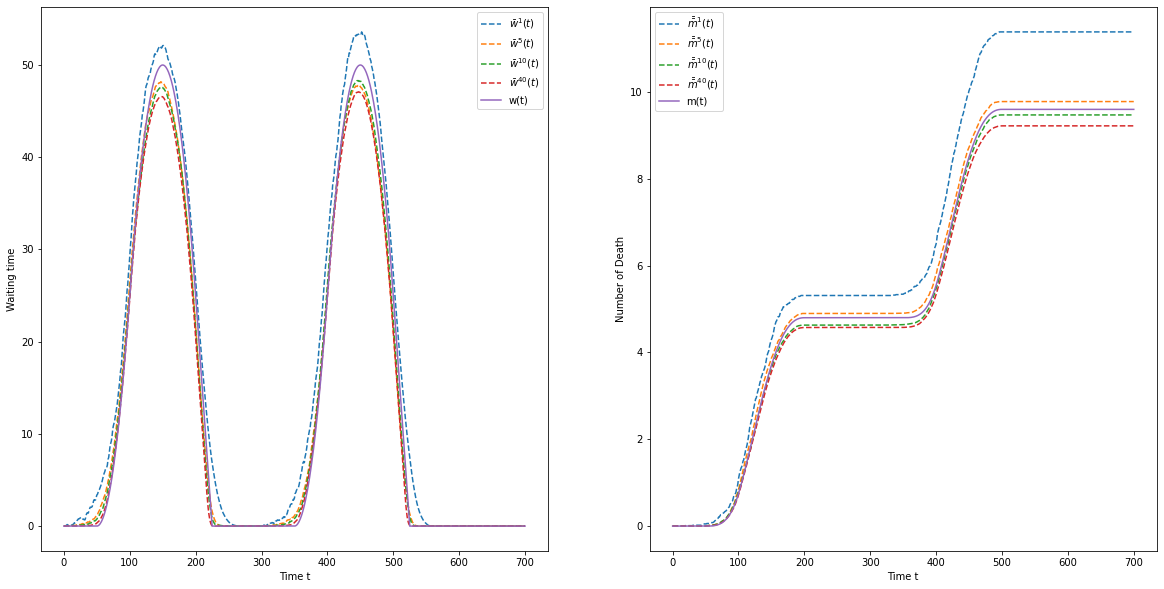

In [23]:
fs = [1, 5, 10, 40]
fig, axs = plt.subplots(1,2,figsize=(20, 10))
axs[0].set_xlabel('Time t')
axs[0].set_ylabel('Waiting time')
axs[1].set_xlabel('Time t')
axs[1].set_ylabel('Number of Death')
T = 700

for fluidScale in fs:
    generatorsParams = {
                    "P":[0.4,0.6],
                    "Q": [1, 1],
                    "abandonMeans": abandonMeans, 
                    "serviceRates": Mu_k,
                    "stopTime": T,
                    "arrivalRate": carmelArrivalRate,
                    "maxRate": 2, 
                    "method": 'thinning',
                    "fluidScale":fluidScale}

    patientFn, serviceTimeFn = createGenerators(**generatorsParams)
    t = np.linspace(0,T,T+1)
    expectW = np.zeros_like(t)
    expectD = np.zeros_like(t)

    for i in range(100):
        arrivalTime, virtualWaits, jumpTime, cumdead = simulate(X, patientFn, serviceTimeFn, T)
        VirtualWaitFn = CreateVirtualWaitFn(arrivalTime, virtualWaits, jumpTime)
        CumDeathFn = CreateCumDeathFn(arrivalTime, cumdead)
        expectW += (VirtualWaitFn(t) - expectW)/(i+1)
        expectD += (CumDeathFn(t) - expectD)/(i+1)
        #drawCumDeath(arrivalTime, cumdead, axs[0])
        #drawVirtalWait(arrivalTime, virtualWaits, jumpTime, axs[1])
    axs[0].plot(t, expectW, '--', label=r'$\bar{w}^{'+str(fluidScale)+r'}(t)$')
    axs[1].plot(t, expectD/fluidScale, '--', label=r'$\bar{\bar{m}}^{'+str(fluidScale)+r'}(t)$')

sol = mortality_mistrage_relation([0.4,0.6], [1,1], carmelArrivalRate, Mu_k, abandonMeans, X, T)
axs[0].plot(t, sol[:, 0], '-', label='w(t)')
axs[0].legend()
axs[1].plot(t, sol[:, 1], '-', label='m(t)')
axs[1].legend()

plt.show()

## Constant arrival rate: relationship between mistriage and mortality

In [ ]:
ohparams = {
          "overtriage": [i/50 for i in range(50+1)],
          "undertriage": 0,
          "Class1Prob": Class1Prob,
          "abandonMeans": abandonMeans,
          "serviceRates": Mu_k,
          "arrivalRate": constantArrivalRate,
          "stopTime": 700,
          "fluidScale": 1,
          "maxRate": 2,
          "X": X,
          "simulate_times":1
          }
expectWs, ws, oexpectDs, oms, dws, dds = mistriage_mortality(ohparams)

[1, 0.0]
[1, 0.02]
[1, 0.04]
[1, 0.06]
[1, 0.08]
[1, 0.1]
[1, 0.12]
[1, 0.14]
[1, 0.16]
[1, 0.18]
[1, 0.2]
[1, 0.22]
[1, 0.24]
[1, 0.26]
[1, 0.28]
[1, 0.3]
[1, 0.32]
[1, 0.34]
[1, 0.36]
[1, 0.38]
[1, 0.4]
[1, 0.42]
[1, 0.44]
[1, 0.46]
[1, 0.48]
[1, 0.5]
[1, 0.52]
[1, 0.54]
[1, 0.56]
[1, 0.58]
[1, 0.6]
[1, 0.62]
[1, 0.64]
[1, 0.66]
[1, 0.68]
[1, 0.7]
[1, 0.72]
[1, 0.74]
[1, 0.76]
[1, 0.78]
[1, 0.8]
[1, 0.82]
[1, 0.84]
[1, 0.86]
[1, 0.88]
[1, 0.9]
[1, 0.92]
[1, 0.94]
[1, 0.96]
[1, 0.98]
[1, 1.0]


In [ ]:
uhparams = {"overtriage": 1,
          "undertriage": [i/50 for i in range(50+1)],
          "Class1Prob": Class1Prob,
          "abandonMeans": abandonMeans,
          "serviceRates": Mu_k,
          "arrivalRate": constantArrivalRate,
          "stopTime": 700,
          "fluidScale": 1,
          "maxRate": 2,
          "X": X,
          "simulate_times":1
          }
expectWs, ws, uexpectDs, ums, dws, dds = mistriage_mortality(uhparams)

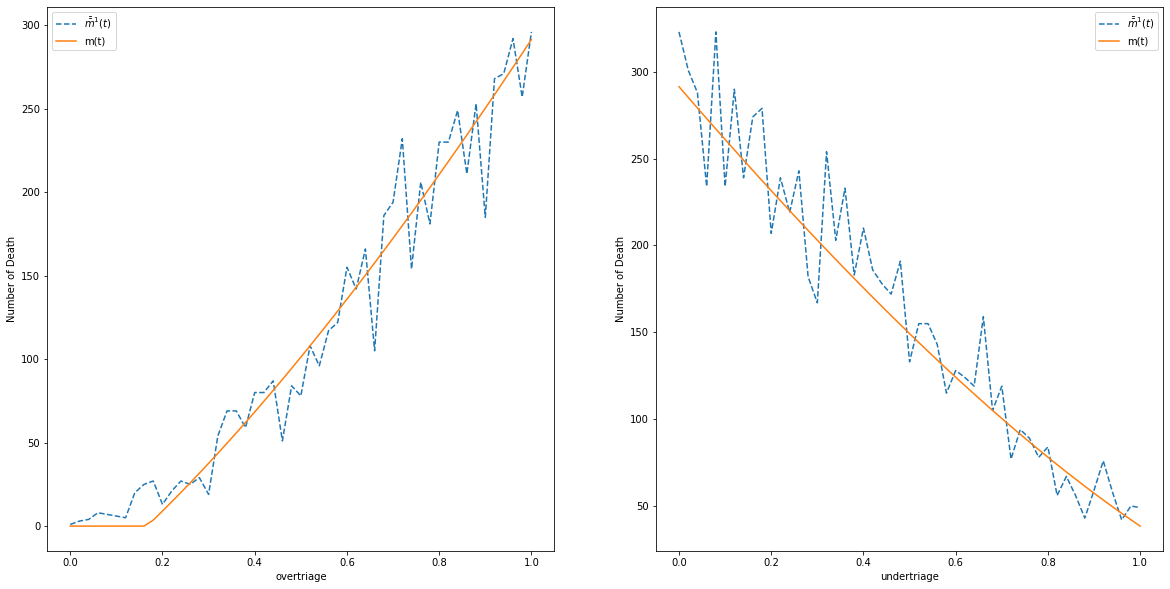

In [ ]:
fig, axs = plt.subplots(1,2,figsize=(20, 10))
mistriage_mortality_plt(ohparams["overtriage"], "overtriage", oexpectDs, oms, ohparams['fluidScale'], axs[0])
mistriage_mortality_plt(uhparams["undertriage"], "undertriage", uexpectDs, ums, uhparams['fluidScale'], axs[1])
plt.show()

## Non-stationary arrival

In [ ]:
ohparams = {"overtriage": [i/50 for i in range(50+1)],
          "undertriage": undertriage,
          "Class1Prob": Class1Prob,
          "abandonMeans": abandonMeans,
          "serviceRates": Mu_k,
          "arrivalRate": carmelArrivalRate,
          "stopTime": 700,
          "fluidScale": 1,
          "maxRate": 2,
          "X": X,
          "simulate_times":100
          }
expectWs, ws, oexpectDs, oms, dws, dds = mistriage_mortality(ohparams)

/usr/local/lib/python3.7/dist-packages/scipy/integrate/odepack.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


In [ ]:
uhparams = {"overtriage": 1,
          "undertriage": [i/50 for i in range(50+1)],
          "Class1Prob": Class1Prob,
          "abandonMeans": abandonMeans,
          "serviceRates": Mu_k,
          "arrivalRate": carmelArrivalRate,
          "stopTime": 700,
          "fluidScale": 1,
          "maxRate": 2,
          "X": X,
          "simulate_times":100
          }
expectWs, ws, uexpectDs, ums, dws, dds = mistriage_mortality(uhparams)

/usr/local/lib/python3.7/dist-packages/scipy/integrate/odepack.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


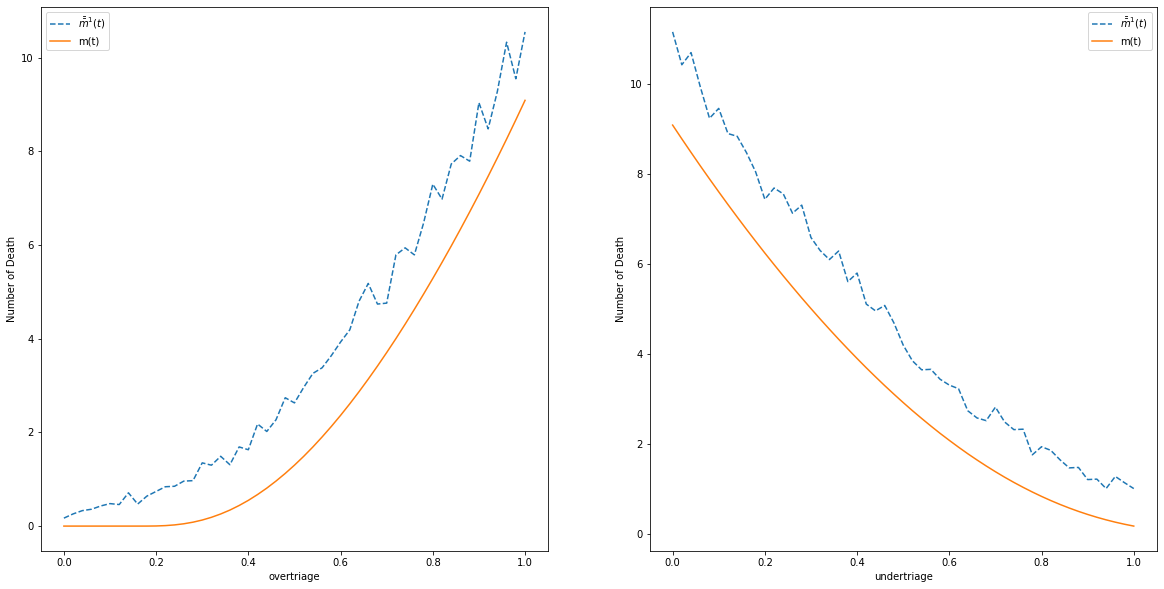

In [ ]:
fig, axs = plt.subplots(1,2,figsize=(20, 10))
mistriage_mortality_plt(ohparams["overtriage"], "overtriage", oexpectDs, oms, ohparams['fluidScale'], axs[0])
mistriage_mortality_plt(uhparams["undertriage"], "undertriage", uexpectDs, ums, uhparams['fluidScale'], axs[1])
plt.show()

In [ ]:
ohparams = {"overtriage": [i/50 for i in range(50+1)],
          "undertriage": 0,
          "Class1Prob": Class1Prob,
          "abandonMeans": abandonMeans,
          "serviceRates": Mu_k,
          "arrivalRate": linearArrivalRate,
          "stopTime": 700,
          "fluidScale": 1,
          "maxRate": 2,
          "X": X,
          "simulate_times":1
          }
expectWs, ws, oexpectDs, oms, dws, dds = mistriage_mortality(ohparams)

In [ ]:
uhparams = {"overtriage": 1,
          "undertriage": [i/50 for i in range(50+1)],
          "Class1Prob": Class1Prob,
          "abandonMeans": abandonMeans,
          "serviceRates": Mu_k,
          "arrivalRate": linearArrivalRate,
          "stopTime": 700,
          "fluidScale": 1,
          "maxRate": 2,
          "X": X,
          "simulate_times":1
          }
expectWs, ws, uexpectDs, ums, dws, dds = mistriage_mortality(uhparams)

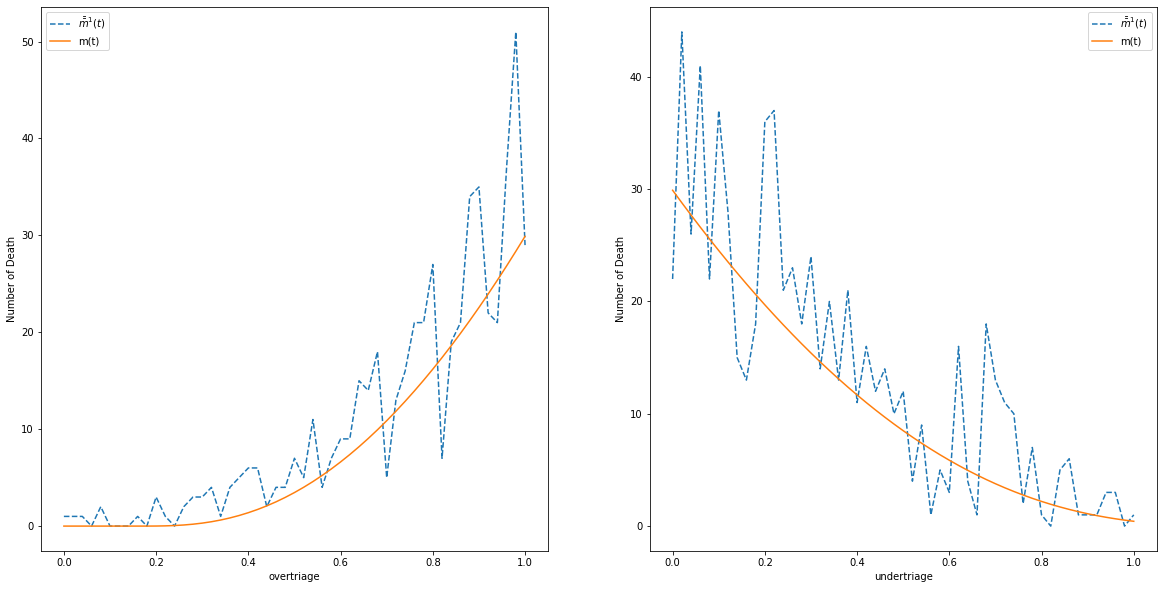

In [ ]:
fig, axs = plt.subplots(1,2,figsize=(20, 10))
mistriage_mortality_plt(ohparams["overtriage"], "overtriage", oexpectDs, oms, ohparams['fluidScale'], axs[0])
mistriage_mortality_plt(uhparams["undertriage"], "undertriage", uexpectDs, ums, uhparams['fluidScale'], axs[1])
plt.show()

In [ ]:
ohparams = {"overtriage": [i/50 for i in range(50+1)],
          "undertriage": 0,
          "Class1Prob": Class1Prob,
          "abandonMeans": abandonMeans,
          "serviceRates": Mu_k,
          "arrivalRate": constantArrivalRate,
          "stopTime": 700,
          "fluidScale": 1,
          "maxRate": 2,
          "X": X,
          "simulate_times":0
          }
expectWs, ws, oexpectDs, oms, dws, dds = mistriage_mortality(ohparams)

In [ ]:
uhparams = {"overtriage": 1,
          "undertriage": [i/50 for i in range(50+1)],
          "Class1Prob": Class1Prob,
          "abandonMeans": abandonMeans,
          "serviceRates": Mu_k,
          "arrivalRate": constantArrivalRate,
          "stopTime": 700,
          "fluidScale": 1,
          "maxRate": 2,
          "X": X,
          "simulate_times":0
          }
expectWs, ws, uexpectDs, ums, dws, dds = mistriage_mortality(uhparams)

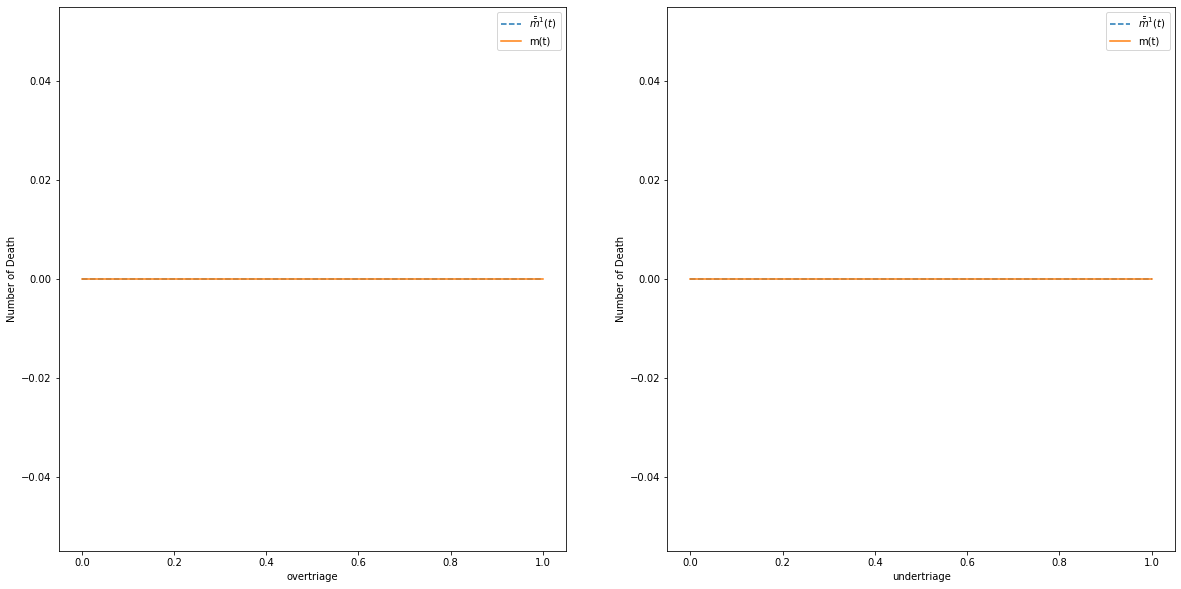

In [ ]:
fig, axs = plt.subplots(1,2,figsize=(20, 10))
mistriage_mortality_plt(ohparams["overtriage"], "overtriage", oexpectDs, oms, ohparams['fluidScale'], axs[0])
mistriage_mortality_plt(uhparams["undertriage"], "undertriage", uexpectDs, ums, uhparams['fluidScale'], axs[1])
plt.show()

# Virtual waiting time sample path

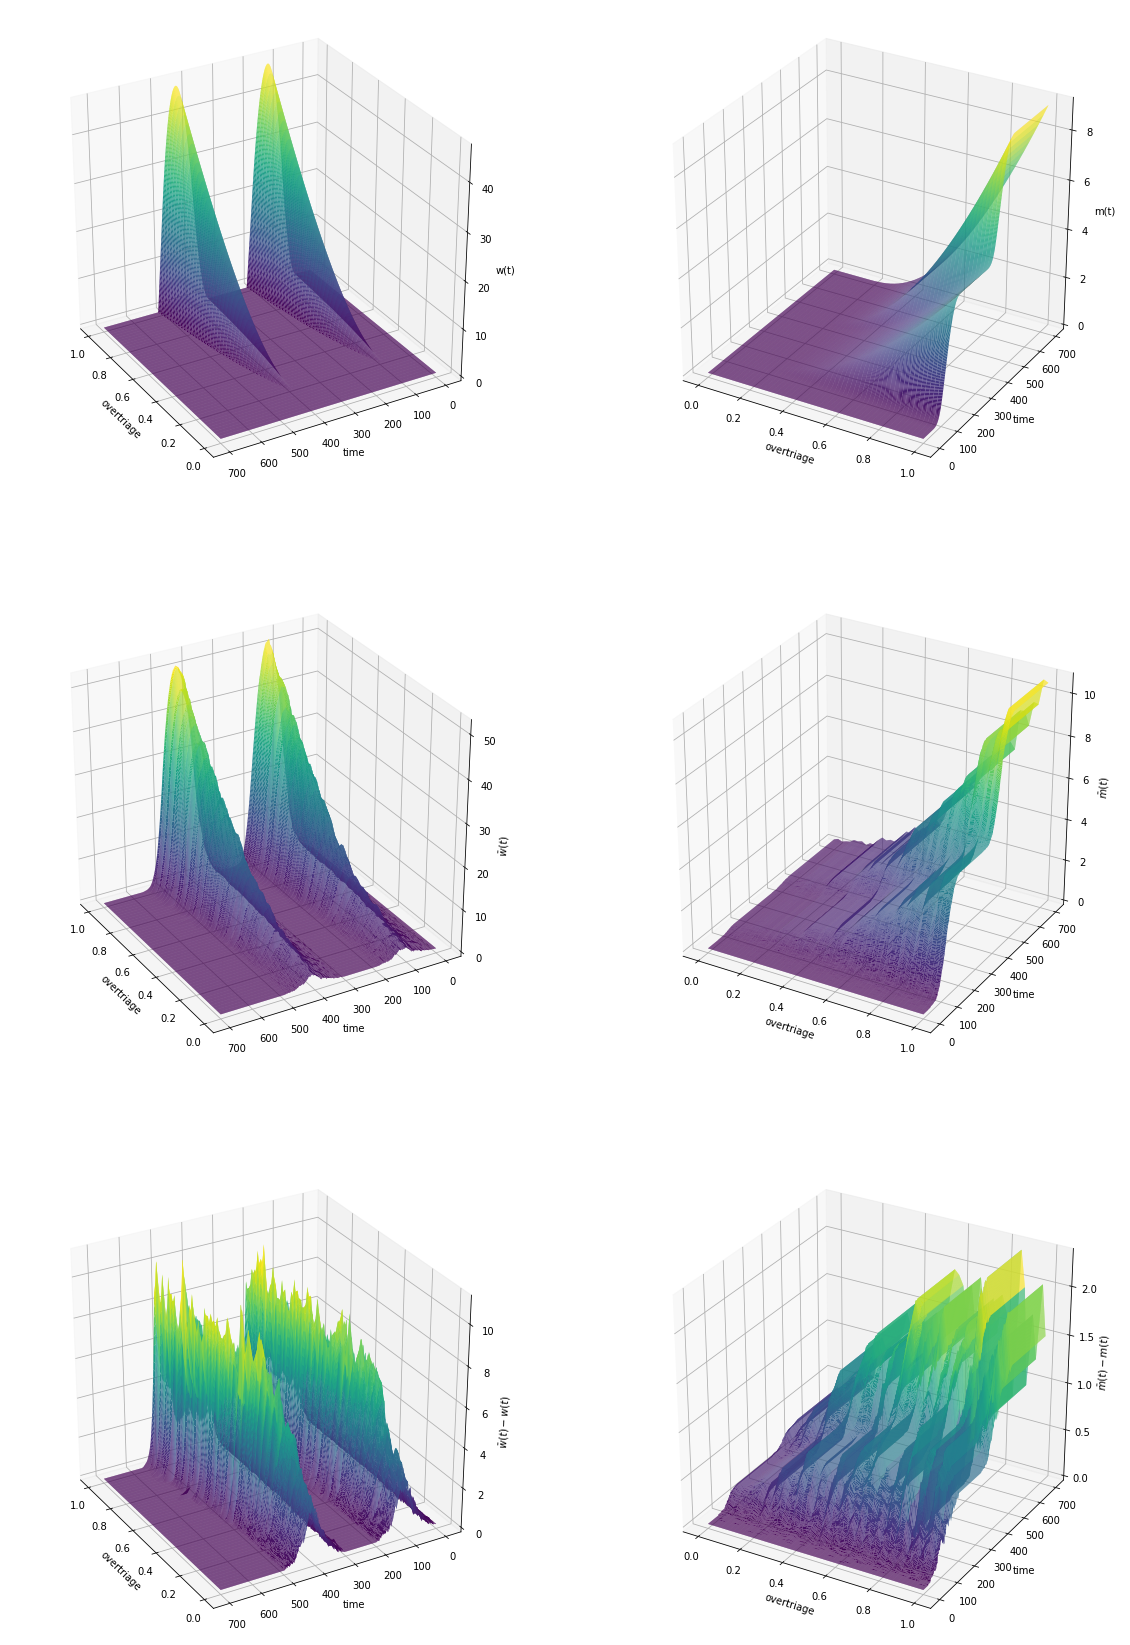

In [ ]:
T = hparams['stopTime']
Overtriages, Times = np.meshgrid(np.array(hparams['overtriage']), np.linspace(0,T,T+1))
fig = plt.figure(figsize=(20, 30))
deg = 150
#first plot
ax = fig.add_subplot(3, 2, 1, projection='3d')
ax.plot_surface(Overtriages, Times, ws, rstride=1, cstride=1, cmap='viridis', edgecolor='none', label='Theoretical')
ax.set_xlabel('overtriage')
ax.set_ylabel('time')
ax.set_zlabel('w(t)')
ax.view_init(azim=deg)

ax = fig.add_subplot(3, 2, 2, projection='3d')
ax.plot_surface(Overtriages, Times, ms, rstride=1, cstride=1, cmap='viridis', edgecolor='none', label='Theoretical')
#ax.plot_surface(Overtriages, Times, expectDs, cmap='binary', label='simulate')
ax.set_xlabel('overtriage')
ax.set_ylabel('time')
ax.set_zlabel('m(t)')


#first plot
ax = fig.add_subplot(3, 2, 3, projection='3d')
ax.plot_surface(Overtriages, Times, expectWs, rstride=1, cstride=1, cmap='viridis', edgecolor='none', label='simulate')
ax.set_xlabel('overtriage')
ax.set_ylabel('time')
ax.set_zlabel(r'$\bar{w}(t)$')
ax.view_init(azim=deg)

ax = fig.add_subplot(3, 2, 4, projection='3d')
ax.plot_surface(Overtriages, Times, expectDs, rstride=1, cstride=1, cmap='viridis', edgecolor='none', label='simulate')
ax.set_xlabel('overtriage')
ax.set_ylabel('time')
ax.set_zlabel(r'$\bar{m}(t)$')


ax = fig.add_subplot(3, 2, 5, projection='3d')
#ax.plot_surface(Overtriages, Times, ws, cmap='viridis', edgecolor='none', label='Theoretical')
#ax.plot_surface(Overtriages, Times, expectWs, cmap='binary', label='simulate')
ax.plot_surface(Overtriages, Times, dws, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none', label='difference')


ax.set_xlabel('overtriage')
ax.set_ylabel('time')
ax.set_zlabel(r'$\bar{w}(t)-w(t)$')
ax.view_init(azim=deg)
#second plot
ax = fig.add_subplot(3, 2, 6, projection='3d')
#ax.plot_surface(Overtriages, Times, ms, cmap='viridis', edgecolor='none', label='Theoretical')
#ax.plot_surface(Overtriages, Times, expectDs, cmap='binary', label='simulate')
ax.plot_surface(Overtriages, Times, dds, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none', label='difference')
ax.set_xlabel('overtriage')
ax.set_ylabel('time')
ax.set_zlabel(r'$\bar{m}(t)-m(t)$')

fig.savefig('overtriage.png')
plt.show()

## generate undertriage data

In [ ]:
t = np.linspace(0,T,T+1)
overtriage = 0.5
undertriages = np.array([i/iter for i in range(iter+1)])
ws = []
ms=[]
expectWs = []
expectDs = []
Undertriages, Times = np.meshgrid(undertriages, t)
for undertriage in undertriages:
    
    generatorsParams = {"overtriage": overtriage,
                    "undertriage": undertriage, 
                    "Class1Prob": Class1Prob, 
                    "abandonMeans": abandonMeans, 
                    "serviceRates": Mu_k,
                    "stopTime": T,
                    "arrivalRateInverse":carmelArrivalRateInverse, 
                    "arrivalRate": carmelArrivalRate,
                    "maxRate": 2, 
                    "method": 'thinning',
                    "fluidScale":1}
    patientFn, serviceTimeFn = createGenerators(**generatorsParams)
    expectW = np.zeros_like(t)
    expectD = np.zeros_like(t)

    
    for i in range(100):
        arrivalTime, virtualWaits, jumpTime, cumdead = simulate(X, patientFn, serviceTimeFn, T)
        VirtualWaitFn = CreateVirtualWaitFn(arrivalTime, virtualWaits, jumpTime)
        CumDeathFn = CreateCumDeathFn(arrivalTime, cumdead)
        expectW += (VirtualWaitFn(t) - expectW)/(i+1)
        expectD += (CumDeathFn(t) - expectD)/(i+1)
        #drawCumDeath(arrivalTime, cumdead, axs[0])
        #drawVirtalWait(arrivalTime, virtualWaits, jumpTime, axs[1])
    expectWs.append(expectW)
    expectDs.append(expectD)
    
    
    sol = mortality_mistrage_relation(overtriage, undertriage, Class1Prob, carmelArrivalRate, Mu_k, abandonMeans, X, T)
    ws.append(sol[:,0])
    ms.append(sol[:,1])
expectWs = np.array(expectWs).T
ws = np.array(ws).T
expectDs = np.array(expectDs).T
ms = np.array(ms).T

dws = expectWs - ws
dds = expectDs - ms

/usr/local/lib/python3.7/dist-packages/scipy/integrate/odepack.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


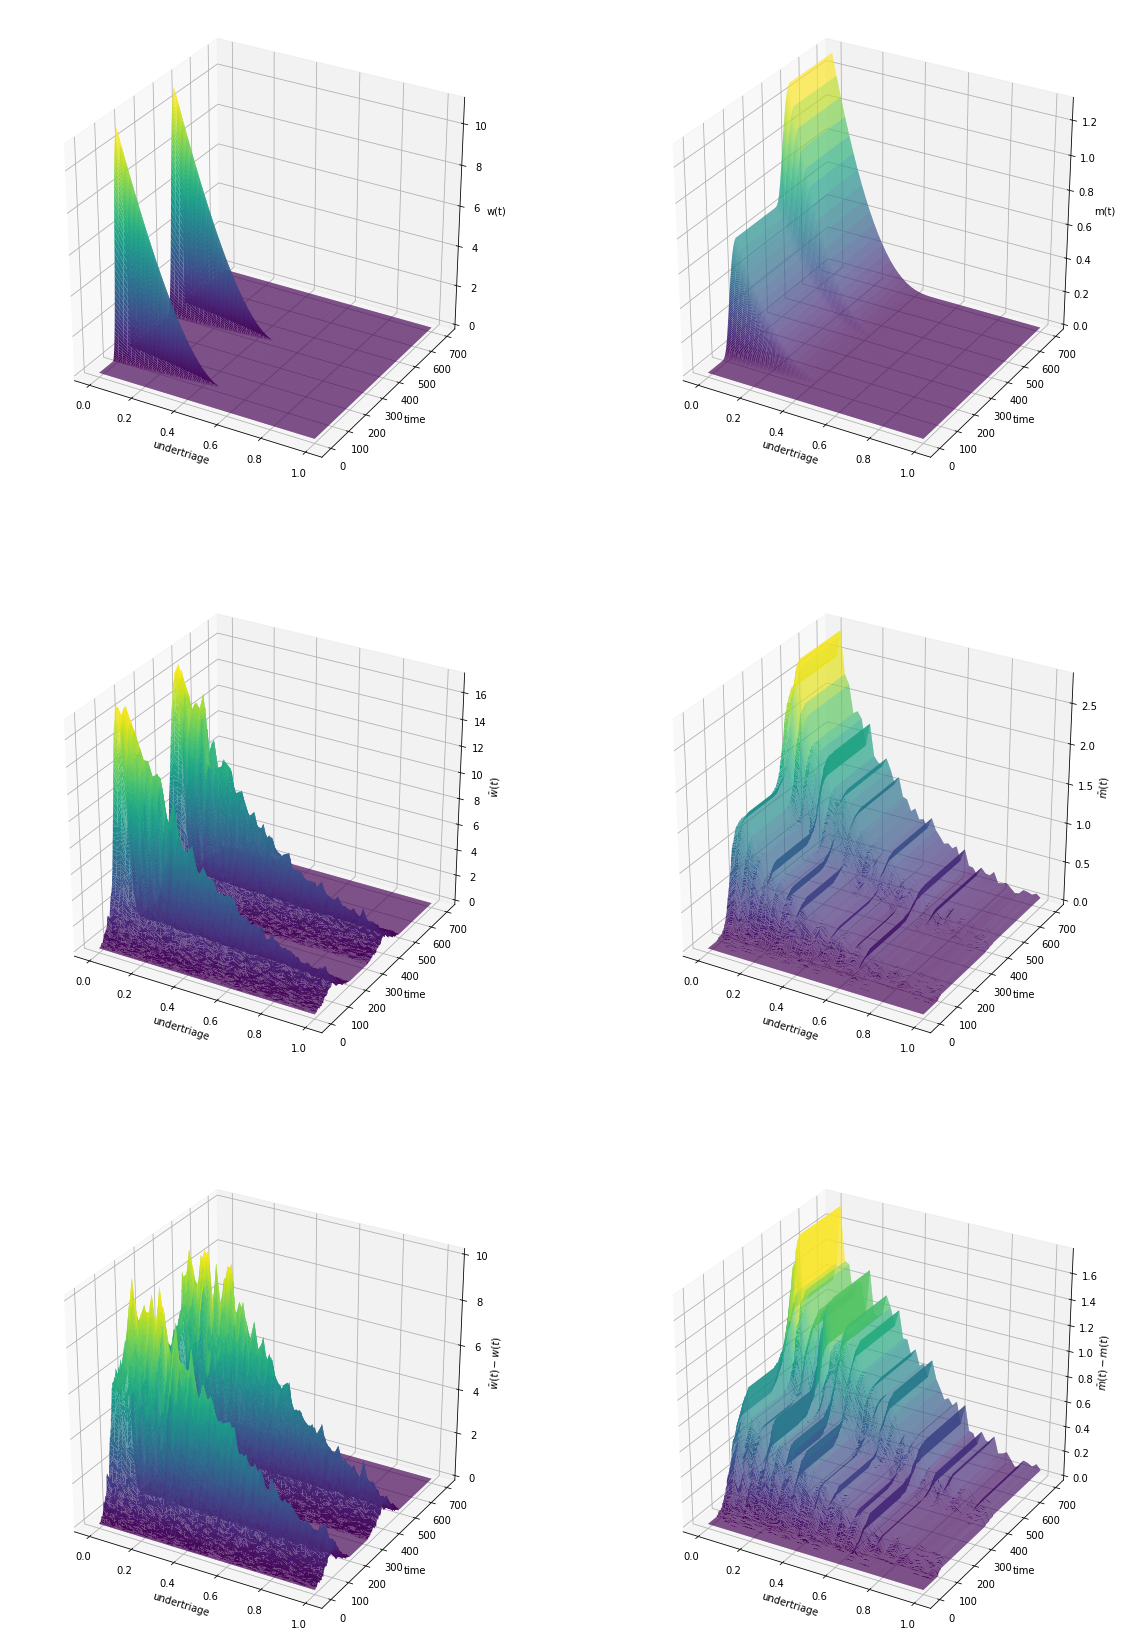

In [ ]:
fig = plt.figure(figsize=(20, 30))
#first plot
ax = fig.add_subplot(3, 2, 1, projection='3d')
ax.plot_surface(Undertriages, Times, ws, rstride=1, cstride=1, cmap='viridis', edgecolor='none', label='Theoretical')
ax.set_xlabel('undertriage')
ax.set_ylabel('time')
ax.set_zlabel('w(t)')


ax = fig.add_subplot(3, 2, 2, projection='3d')
ax.plot_surface(Undertriages, Times, ms, rstride=1, cstride=1, cmap='viridis', edgecolor='none', label='Theoretical')
ax.set_xlabel('undertriage')
ax.set_ylabel('time')
ax.set_zlabel('m(t)')


#first plot
ax = fig.add_subplot(3, 2, 3, projection='3d')
ax.plot_surface(Undertriages, Times, expectWs, rstride=1, cstride=1, cmap='viridis', edgecolor='none', label='simulate')
ax.set_xlabel('undertriage')
ax.set_ylabel('time')
ax.set_zlabel(r'$\bar{w}(t)$')


ax = fig.add_subplot(3, 2, 4, projection='3d')
ax.plot_surface(Undertriages, Times, expectDs, rstride=1, cstride=1, cmap='viridis', edgecolor='none', label='simulate')
ax.set_xlabel('undertriage')
ax.set_ylabel('time')
ax.set_zlabel(r'$\bar{m}(t)$')


ax = fig.add_subplot(3, 2, 5, projection='3d')
ax.plot_surface(Undertriages, Times, dws, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none', label='difference')


ax.set_xlabel('undertriage')
ax.set_ylabel('time')
ax.set_zlabel(r'$\bar{w}(t)-w(t)$')

#second plot
ax = fig.add_subplot(3, 2, 6, projection='3d')
ax.plot_surface(Undertriages, Times, dds, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none', label='difference')
ax.set_xlabel('undertriage')
ax.set_ylabel('time')
ax.set_zlabel(r'$\bar{m}(t)-m(t)$')
fig.savefig('undertriage.png')
plt.show()

# Effect of Fluid Scale

In [ ]:
fig.savefig('fluid_scale.png')

In [ ]:
generatorsParams = {"overtriage": overtriage,
                    "undertriage": undertriage, 
                    "Class1Prob": Class1Prob, 
                    "abandonMeans": abandonMeans, 
                    "serviceRates": Mu_k,
                    "stopTime": T,
                    "arrivalRateInverse":carmelArrivalRateInverse, 
                    "arrivalRate": carmelArrivalRate,
                    "maxRate": 2, 
                    "method": 'thinning',
                    "fluidScale":fluidScale}

patientFn, serviceTimeFn = createGenerators(**generatorsParams)
t = np.linspace(0,T,T+1)
expectW = np.zeros_like(t)
expectD = np.zeros_like(t)
fig, axs = plt.subplots(1,2,figsize=(20, 10))

for i in range(100):
    arrivalTime, virtualWaits, jumpTime, cumdead = simulate(X, patientFn, serviceTimeFn, T)
    VirtualWaitFn = CreateVirtualWaitFn(arrivalTime, virtualWaits, jumpTime)
    CumDeathFn = CreateCumDeathFn(arrivalTime, cumdead)
    expectW += (VirtualWaitFn(t) - expectW)/(i+1)
    expectD += (CumDeathFn(t) - expectD)/(i+1)
    #drawCumDeath(arrivalTime, cumdead, axs[0])
    #drawVirtalWait(arrivalTime, virtualWaits, jumpTime, axs[1])
axs[0].plot(t, expectD/fluidScale, '--', label='Simulation')
axs[1].plot(t, expectW, '--', label='Simulation')

sol = mortality_mistrage_relation(overtriage, undertriage, Class1Prob, carmelArrivalRate, Mu_k, abandonMeans, X, T)
axs[0].plot(t, sol[:, 1], '-', label='Theoretical')
axs[1].plot(t, sol[:, 0], '-', label='Theoretical')
plt.legend()
plt.show()

# Mistriage and mortality constant arraval rate

In [ ]:
'''
# change class type and triage to distribution
def createGenerators(overtriage, undertriage, Class1Prob, abandonMeans, serviceRates, stopTime, fluidScale=1, arrivalRateInverse=None, arrivalRate=None, maxRate=None,  method='thinning'):
    def patientFn(t):
        interArrivalTime = interArrivalTimeFn(t)
        if interArrivalTime == None:
            return None, None, None
        patientClass = classFn() 
        lifeRemaining = abandonFns[patientClass-1]()
        while triageFuns[patientClass-1]() != 1:
            A = interArrivalTimeFn(t+interArrivalTime)
            if A == None:
                return None, None, None
            interArrivalTime += A
            patientClass = classFn()
            lifeRemaining = abandonFns[patientClass-1]()
        return interArrivalTime, lifeRemaining, patientClass
    def serviceTimeFn(info):
        serviceTime = SimRNG.Expon(1/(serviceRates(0)[info-1]*fluidScale), Stream)
        return serviceTime
    Stream = 1
    classFn, Stream = createRandom_integerGenetrator([Class1Prob,1], Stream)
    class1TriageFn, Stream = createRandom_integerGenetrator([1-undertriage,1], Stream)
    class2TriageFn, Stream = createRandom_integerGenetrator([overtriage,1], Stream)
    triageFuns = [class1TriageFn, class2TriageFn]
    abandonFns = []
    for abandonMean in abandonMeans:
        #abandonTimeFn, Stream = createConstantGenerator(abandonMean, Stream)
        abandonTimeFn, Stream = createExpoGenerator(abandonMean, Stream)
        abandonFns.append(abandonTimeFn)
    if method =='inverse':
        base, Stream = createHyoerExpGenerator(Stream)
        interArrivalTimeFn, Stream = createNSAPInverseMethod(1, base, arrivalRateInverse, Stream)
    elif method == 'thinning':
        base = Exponential(maxRate*fluidScale, Stream)
        interArrivalTimeFn, Stream = createNSAPthinningMethod(arrivalRate, base, Stream, fluidScale, stopTime)
    elif method == 'constant':
        interArrivalTimeFn, Stream = createConstantGenerator(arrivalRate, Stream)
        serviceTimeFn, Stream = createMultiConstantGenerator(serviceRates, Stream)
    return patientFn, serviceTimeFn
#rate is a class contains rate function and (max rate attribute or inverse function), if fluid scale applied, then put it in the attribute
#arrival:(rate, base distribution) -> rate can be a constant or function -> if arrival is a function use thinning method -> max rate must be provid
#abandon:
#service:
'''